* Data Collection Reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-01-read_html.ipynb
* Data analysis reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-02-eda.ipynb

In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2020-09-12


In [2]:
import pandas as pd
import numpy as np

In [3]:
# target url for the covid19 data: Seoul City
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [4]:
# read all table datas in the web html template
tables = pd.read_html(url)
tables

[   종로구   중구  용산구  성동구  광진구  동대문구  중랑구  성북구  강북구  도봉구  노원구  은평구 서대문구
 0   81   55  111  106  118   136  173  308  132  157  276  228  113
 1  마포구  양천구  강서구  구로구  금천구  영등포구  동작구  관악구  서초구  강남구  송파구  강동구   기타
 2  146  163  248  158   82   163  200  320  168  221  294  174  308,
     종로구   중구  용산구  성동구  광진구 동대문구
 0    81   55  111  106  118  136
 1   중랑구  성북구  강북구  도봉구  노원구  은평구
 2   173  308  132  157  276  228
 3  서대문구  마포구  양천구  강서구  구로구  금천구
 4   113  146  163  248  158   82
 5  영등포구  동작구  관악구  서초구  강남구  송파구
 6   163  200  320  168  221  294
 7   강동구   기타  NaN  NaN  NaN  NaN
 8   174  308  NaN  NaN  NaN  NaN,
      소계  해외접촉관련  강남구 K보건 산업  송파구 쿠팡 관련  서대문구 세브란스 병원  동작구 요양 시설  종로구청 관련  \
 0  4639     400          10         17            22          9       12   
 
    강동구 BF모바일 콜센터  영등포구 일련정종 서울포교소  노원구 빛가온 교회  서초구 장애인 교육시설  성북구 사랑제일 교회  \
 0             25               22          46             8          641   
 
    8·15 서울도심 집회  동작구 진흥 글로벌  광진구 혜민 병원  서울 아산병원  타 시·도 확진자 접촉자    기타 

In [5]:
# index the table with covid19 patient data
tables[-2]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4639,22019,9.11.,강서구,-,타시도 확진자 접촉,NaN
1,4638,22035,9.11.,용산구,-,타시도 확진자 접촉,NaN
2,4637,22028,9.11.,송파구,-,송파구 쿠팡 관련,NaN
3,4636,22015,9.11.,은평구,-,강남구 K보건산업,NaN
4,4635,22016,9.11.,은평구,-,타시도 확진자 접촉,NaN
...,...,...,...,...,...,...,...
4634,5,9,1.31.,성북구,-,#5 접촉,퇴원
4635,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
4636,3,6,1.30.,종로구,-,#3 접촉,퇴원
4637,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [6]:
# get number of confirmed cases and numbers of columns
df = tables[-2]
df.shape

(4639, 7)

In [7]:
# peek at the dataframe
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4639,22019,9.11.,강서구,-,타시도 확진자 접촉,NaN
1,4638,22035,9.11.,용산구,-,타시도 확진자 접촉,NaN
2,4637,22028,9.11.,송파구,-,송파구 쿠팡 관련,NaN
3,4636,22015,9.11.,은평구,-,강남구 K보건산업,NaN
4,4635,22016,9.11.,은평구,-,타시도 확진자 접촉,NaN


In [8]:
# most upto-date data
last_day = df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'9_11_'

In [9]:
# naming file and setting the path
dataset_path = "./dataset/"
file_name = f"seoul_covid_{last_day}.csv"
file_path = dataset_path + file_name
file_path

'./dataset/seoul_covid_9_11_.csv'

In [10]:
df.to_csv(file_path, index=False)

In [11]:
# reed the covid dataset
df = pd.read_csv(file_path)

In [12]:
# sort according to the patient number
df = df.sort_values(["연번"], ascending=False)
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4639,22019,9.11.,강서구,-,타시도 확진자 접촉,NaN
1,4638,22035,9.11.,용산구,-,타시도 확진자 접촉,NaN
2,4637,22028,9.11.,송파구,-,송파구 쿠팡 관련,NaN
3,4636,22015,9.11.,은평구,-,강남구 K보건산업,NaN
4,4635,22016,9.11.,은평구,-,타시도 확진자 접촉,NaN
5,4634,22007,9.11.,관악구,-,확인 중,NaN
6,4633,22050,9.11.,강동구,-,기타 확진자 접촉,NaN
7,4632,22002,9.11.,구로구,-,확인 중,NaN
8,4631,22014,9.11.,양천구,-,확인 중,NaN
9,4630,21991,9.11.,도봉구,-,확인 중,NaN


In [13]:
df_etc = df[df['접촉력'].str.match("기타")]
print(df_etc.shape)
df_etc.sample(15)

(578, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
566,4073,20539,9.01.,강서구,-,기타 확진자 접촉,NaN
511,4128,20614,9.02.,서초구,-,기타 확진자 접촉,NaN
1097,3542,18507,8.26.,송파구,-,기타 확진자 접촉,NaN
2873,1766,14846,8.13.,은평구,-,기타 확진자 접촉,퇴원
143,4496,21651,9.09.,은평구,-,기타 확진자 접촉,NaN
1167,3472,18990,8.27.,서초구,-,기타 확진자 접촉,퇴원
1653,2986,17289,8.23.,노원구,-,기타 확진자 접촉,NaN
646,3993,20252,8.31.,동작구,-,기타 확진자 접촉,NaN
2043,2596,16316,8.20.,강서구,-,기타 확진자 접촉,퇴원
1363,3276,19303,8.26.,관악구,-,기타 확진자 접촉,NaN


In [14]:
# number of patients involved in church
df_church = df[df['접촉력'].str.contains("교회")]
church_infected_proportion = "{0:.0%}".format(round(len(df_church)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion}")
df_church.sample(5)

number of patients incurred from church: 22%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
3509,1130,12148,6.15.,구로구,-,수도권 개척교회 관련,퇴원
2556,2083,15629,8.17.,동작구,-,성북구 사랑제일교회 관련,퇴원
1583,3056,17768,8.24.,영등포구,-,여의도 순복음교회 관련,퇴원
2611,2028,15454,8.16.,마포구,-,성북구 사랑제일교회 관련,퇴원
2684,1955,15253,8.15.,동대문구,-,성북구 사랑제일교회 관련,NaN


In [15]:
# number of patients involved in church other than 사랑제일교회
df_church_2 = df[(df["접촉력"].str.contains("교회") == True) & (df["접촉력"].str.contains("사랑제일교회") == False)]
church_infected_proportion2 = "{0:.0%}".format(round(len(df_church_2)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion2}")
df_church_2.head(5)

number of patients incurred from church: 8%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
29,4610,21986,9.11.,노원구,-,노원구 빛가온교회 관련,NaN
238,4401,21363,9.07.,노원구,-,노원구 빛가온교회 관련,NaN
239,4400,21364,9.07.,노원구,-,노원구 빛가온교회 관련,NaN
298,4341,21233,9.06.,노원구,-,노원구 빛가온교회 관련,NaN
299,4340,21219,9.06.,노원구,-,노원구 빛가온교회 관련,NaN


In [16]:
# count the number of daily confirmed cases
df["확진일"].value_counts()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
4.20.      1
1.24.      1
4.24.      1
3.3.       1
4.30.      1
Name: 확진일, Length: 204, dtype: int64

In [17]:
df["확진일"].head(4)

0    9.11.
1    9.11.
2    9.11.
3    9.11.
Name: 확진일, dtype: object

In [18]:
# transform date(string) into datetime object
df["확진일자"] = pd.to_datetime("2020"+"-"+df["확진일"].str.replace(".","-"))
df["확진일자"].head()

0   2020-09-11
1   2020-09-11
2   2020-09-11
3   2020-09-11
4   2020-09-11
Name: 확진일자, dtype: datetime64[ns]

In [19]:
# extract month, add column for the month
df["월"] = df["확진일자"].dt.month

In [20]:
# extract week, add column for the week
df["주"] = df["확진일자"].dt.week

In [21]:
# make a new column "월일" with datetime format
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,4639,22019,9.11.,강서구,-,타시도 확진자 접촉,NaN,2020-09-11,9,37,09-11
1,4638,22035,9.11.,용산구,-,타시도 확진자 접촉,NaN,2020-09-11,9,37,09-11
2,4637,22028,9.11.,송파구,-,송파구 쿠팡 관련,NaN,2020-09-11,9,37,09-11


## Visualization

In [22]:
import matplotlib.pyplot as plt

# font designation
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [23]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

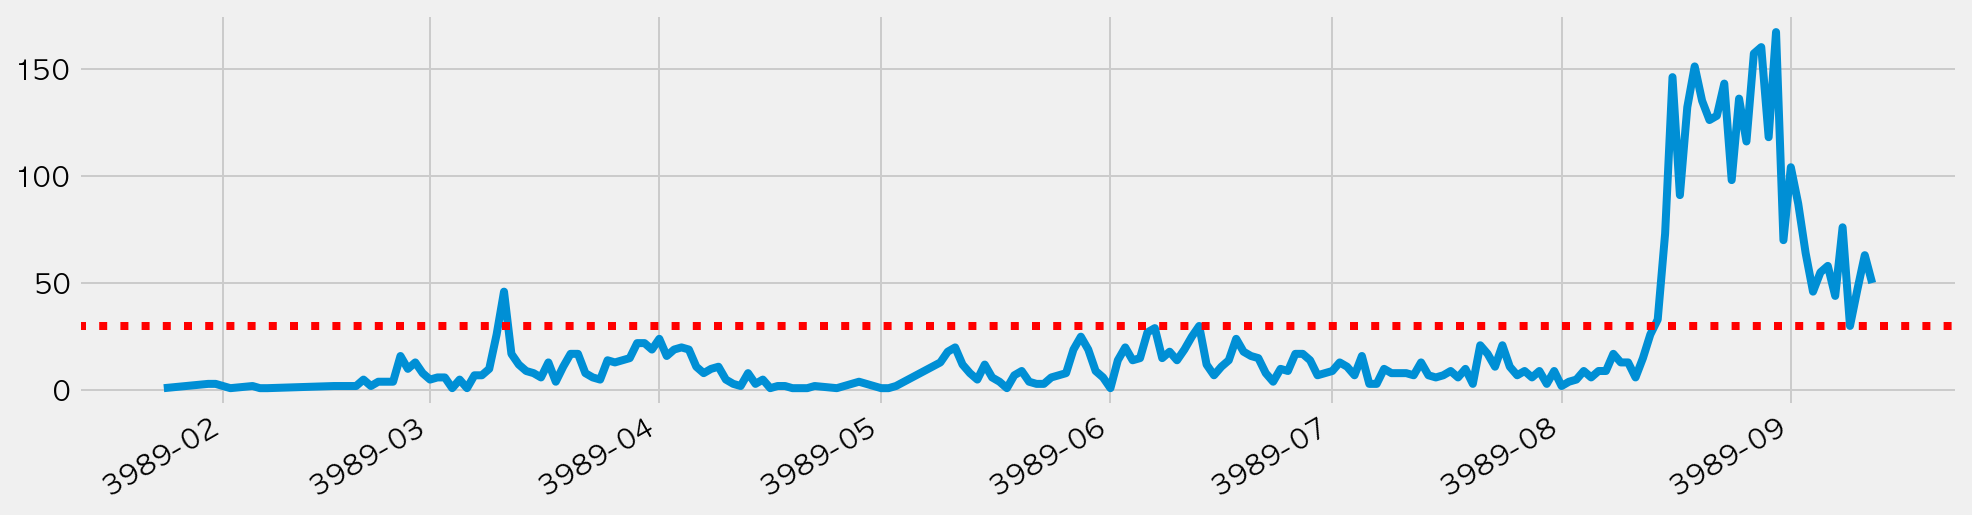

In [24]:
# plot total number of patients graph
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

In [25]:
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,4639,22019,9.11.,강서구,-,타시도 확진자 접촉,NaN,2020-09-11,9,37,09-11
1,4638,22035,9.11.,용산구,-,타시도 확진자 접촉,NaN,2020-09-11,9,37,09-11
2,4637,22028,9.11.,송파구,-,송파구 쿠팡 관련,NaN,2020-09-11,9,37,09-11
3,4636,22015,9.11.,은평구,-,강남구 K보건산업,NaN,2020-09-11,9,37,09-11
4,4635,22016,9.11.,은평구,-,타시도 확진자 접촉,NaN,2020-09-11,9,37,09-11
5,4634,22007,9.11.,관악구,-,확인 중,NaN,2020-09-11,9,37,09-11
6,4633,22050,9.11.,강동구,-,기타 확진자 접촉,NaN,2020-09-11,9,37,09-11
7,4632,22002,9.11.,구로구,-,확인 중,NaN,2020-09-11,9,37,09-11
8,4631,22014,9.11.,양천구,-,확인 중,NaN,2020-09-11,9,37,09-11
9,4630,21991,9.11.,도봉구,-,확인 중,NaN,2020-09-11,9,37,09-11


In [26]:
# take a peek at daily confirmed cases statistics
# 'count' is number of days elasped since covid19 outbreak. Rest of statistics are involved with confirmed cases.
day_count = df["월일"].value_counts().sort_index()
day_count.describe()

count    203.000000
mean      22.852217
std       35.502305
min        1.000000
25%        5.000000
50%       10.000000
75%       19.000000
max      167.000000
Name: 월일, dtype: float64

In [27]:
# get 10 days of recent confirmed cases
day_count[-10:]

09-02    64
09-03    46
09-04    55
09-05    58
09-06    44
09-07    76
09-08    30
09-09    47
09-10    63
09-11    50
Name: 월일, dtype: int64

In [28]:
# get maximum number of confirmed cases
day_count[day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

In [29]:
# get dataframe corresponding to a selected date
df_day = df[df["월일"]=="08-24"]
df_day.head(10)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
679,3960,18896,8.24.,기타,-,동작구 카드 발급업체,NaN,2020-08-24,8,35,08-24
1255,3384,17889,8.24.,기타,-,다래경매 관련,퇴원,2020-08-24,8,35,08-24
1519,3120,17828,8.24.,노원구,-,확인 중,NaN,2020-08-24,8,35,08-24
1520,3119,17903,8.24.,성동구,-,8.15도심집회,NaN,2020-08-24,8,35,08-24
1521,3118,17913,8.24.,광진구,-,8.15도심집회,NaN,2020-08-24,8,35,08-24
1522,3117,17876,8.24.,광진구,-,확인 중,NaN,2020-08-24,8,35,08-24
1523,3116,17866,8.24.,광진구,-,확인 중,NaN,2020-08-24,8,35,08-24
1524,3115,17656,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
1525,3114,17618,8.24.,광진구,-,확인 중,NaN,2020-08-24,8,35,08-24
1526,3113,17598,8.24.,기타,-,8.15도심집회(녹색병원),NaN,2020-08-24,8,35,08-24


In [30]:
# Covid19 infection classified with patients' contact to the disease
number_of_paths = len(df["접촉력"].unique()) # get unique value for types of contagion route 
print(f"Total number of paths for infection: {number_of_paths}")
df["접촉력"].unique()

Total number of paths for infection: 247


array(['타시도 확진자 접촉', '송파구 쿠팡 관련', '강남구 K보건산업', '확인 중', '기타 확진자 접촉',
       '종로구청 관련', '노원구 빛가온교회 관련', '동작구 요양시설 관련', '서초구 장애인교육시설',
       '서대문구 소재 세브란스병원', '강동구 BF모바일 관련', '영등포구 일련정종 서울포교소',
       '서대문구 소재 세브란스병원 관련', '해외 접촉 추정', '종로구청 근로자 관련', '송파구 쿠팡 물류센터',
       '동작구 진흥글로벌', '구로구 아파트 관련', '강동구 BF모바일 콜센터', '영등포 지인모임',
       '8.15서울도심집회', 'KT가좌지사 관련', '도봉구 운동시설', '성북구 사랑제일교회 관련', '노원구 기도모임',
       '관악구 가족모임', '영등포구 국회출입기자관련', '은평구 수색성당', '광진구 혜민병원', '은평구 헤어콕 관련',
       '송파구 소재병원', '극단 산 관련', '영등포구 권능교회', '강동구 소재 병원', '다래경매 관련',
       '성북구 체대입시 관련', '성북구 요양시설', '중구소재 은행 관련', '중랑구 소재 체육시설',
       '관악구 에바다 관련', '동작구 소재 서울신학교', '용인시 우리제일교회 관련', '노원구 손해보험 관련',
       '구로구 보성운수', '강서구 서울대효요양병원', '서대문구 지인모임', '강북구 일가족', '강서구 보안회사',
       '롯데리아 종사자 모임', '강남구 소재 아파트', '제주 게스트하우스 관련', '동작구 카드 발급업체',
       '성북구 벧엘장로교회', '관악구 김혜근의원', '8.15도심집회', '동대문구 sk탁구클럽', '동작구 스터디카페',
       '영등포구 큰권능교회', '군인권센터', '여의도 순복음교회 관련', '중구 보험회사(현대해상)', '강서구 병원관련',
       '성북구 체대입시', '8.15도심집회(순복음 강북교회)',

In [31]:
# get two arrays of unknown route for contagion (미확인경로 확진자)
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [32]:
# overwrite whatever cell value that contains "확인" as "확인 중"
df.loc[df["접촉력"].str.contains("확인"),"접촉력"] = "확인 중"

# check whether those two arrays are combined
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

In [33]:
df["접촉력"].value_counts().head(20)

확인 중             791
성북구 사랑제일교회 관련    640
기타 확진자 접촉        578
해외 접촉 추정         377
타시도 확진자 접촉       195
이태원 클럽 관련        139
리치웨이 관련          119
구로구 콜센터 관련        60
광화문집회 관련          56
노원구 빛가온교회 관련      46
양천구 운동시설 관련       43
요양시설 관련           43
구로구 교회 관련         41
용인시 우리제일교회 관련     41
성북구 체대입시 관련       39
극단 산 관련           37
콜센터직원 접촉          37
수도권 개척교회 관련       37
구로구 아파트 관련        36
강남구 사무실 관련        36
Name: 접촉력, dtype: int64

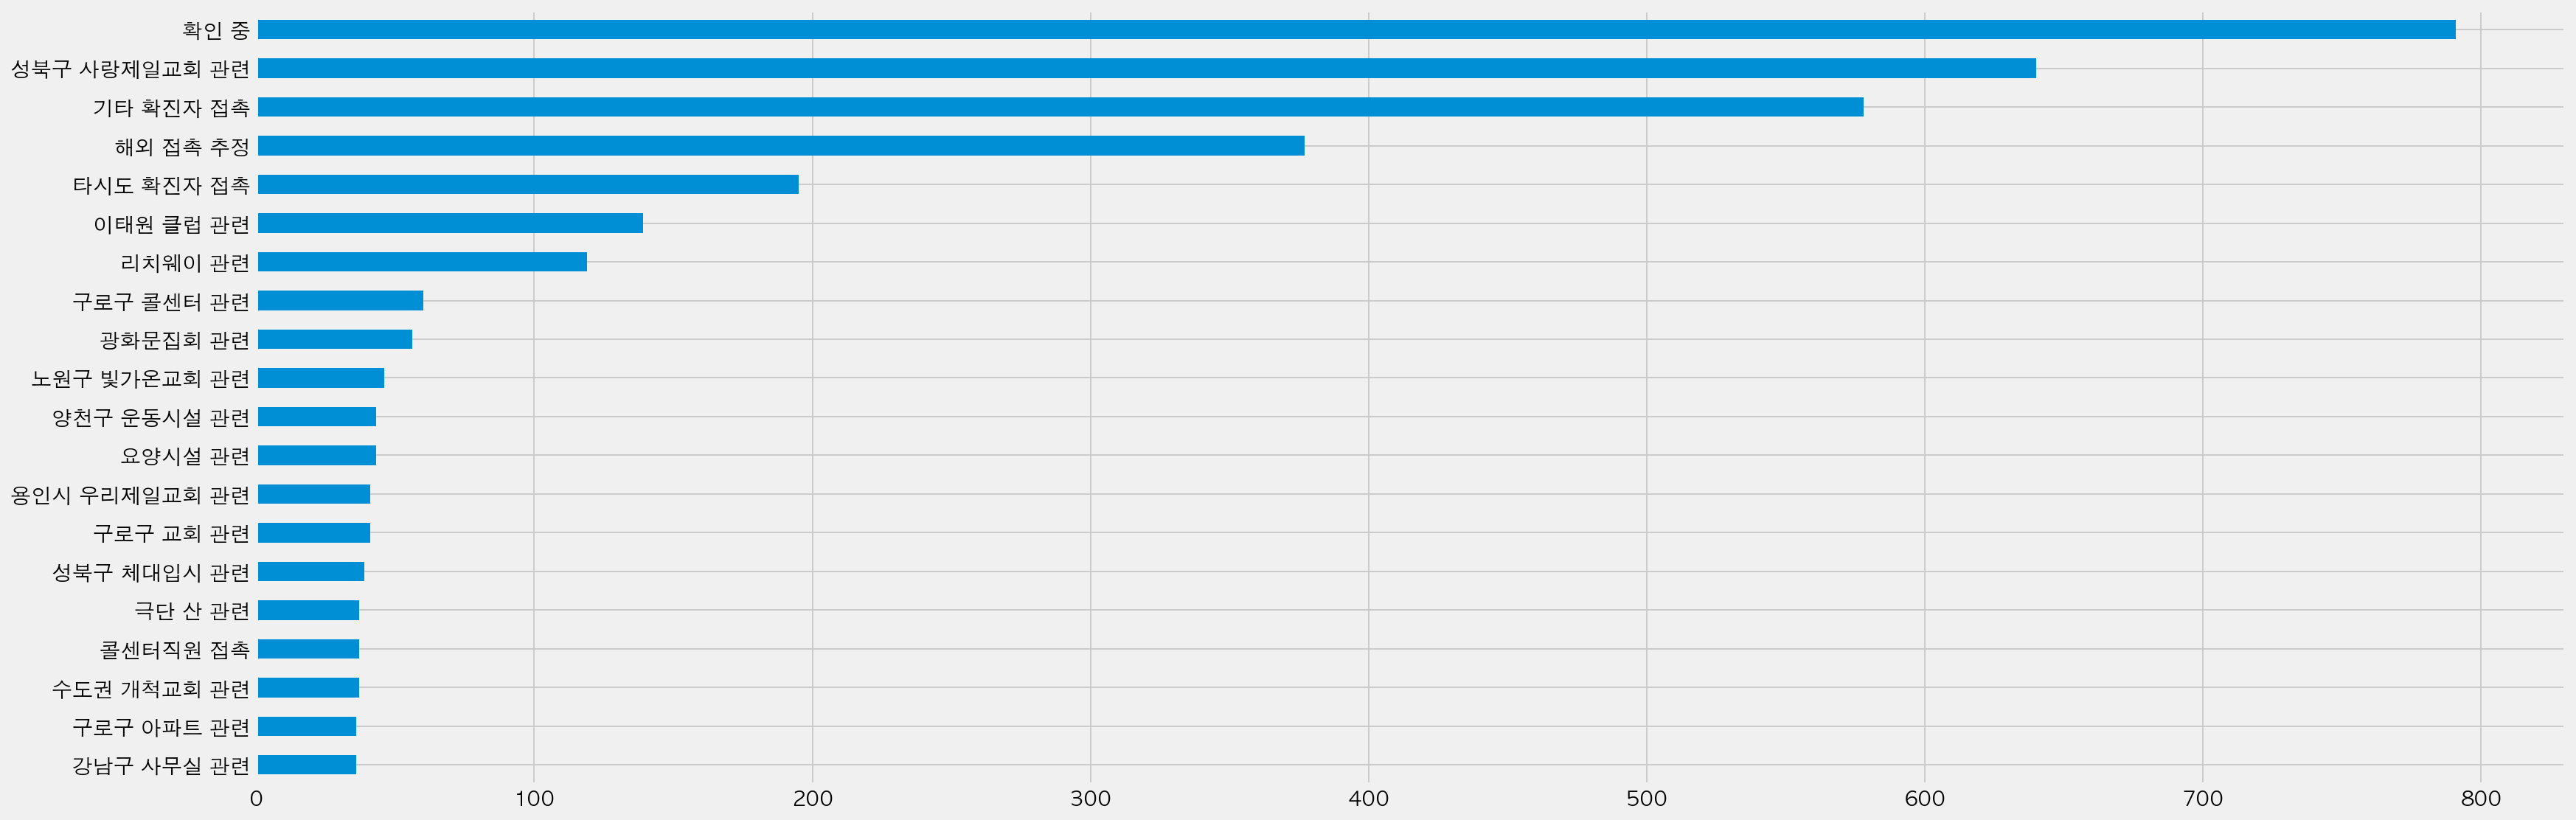

In [34]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(20)
g = contact_count_top.plot.barh(figsize=(25,9))

In [35]:
figure_ranked = g.get_figure()
figure_ranked.savefig("./img/confirmed_path_rank.png")

In [36]:
top_contact = df["접촉력"].value_counts().head(15)
top_contact

확인 중             791
성북구 사랑제일교회 관련    640
기타 확진자 접촉        578
해외 접촉 추정         377
타시도 확진자 접촉       195
이태원 클럽 관련        139
리치웨이 관련          119
구로구 콜센터 관련        60
광화문집회 관련          56
노원구 빛가온교회 관련      46
양천구 운동시설 관련       43
요양시설 관련           43
구로구 교회 관련         41
용인시 우리제일교회 관련     41
성북구 체대입시 관련       39
Name: 접촉력, dtype: int64

In [54]:
# 
top_count_recent = df.loc[df["확진일자"]>="2020-08-12", "접촉력"].value_counts().head(10)
top_count_recent

성북구 사랑제일교회 관련    640
확인 중             586
기타 확진자 접촉        578
타시도 확진자 접촉       144
광화문집회 관련          56
노원구 빛가온교회 관련      46
용인시 우리제일교회 관련     41
성북구 체대입시 관련       39
극단 산 관련           37
구로구 아파트 관련        36
Name: 접촉력, dtype: int64

## 감염경로 불명

In [37]:
df_untracked = df[df["접촉력"]=="확인 중"]
df_untracked

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
5,4634,22007,9.11.,관악구,-,확인 중,NaN,2020-09-11,9,37,09-11
7,4632,22002,9.11.,구로구,-,확인 중,NaN,2020-09-11,9,37,09-11
8,4631,22014,9.11.,양천구,-,확인 중,NaN,2020-09-11,9,37,09-11
9,4630,21991,9.11.,도봉구,-,확인 중,NaN,2020-09-11,9,37,09-11
11,4628,22042,9.11.,관악구,-,확인 중,NaN,2020-09-11,9,37,09-11
...,...,...,...,...,...,...,...,...,...,...,...
4583,56,1768,2.25.,고양시,-,확인 중,퇴원,2020-02-25,2,9,02-25
4597,42,1370,2.25.,노원구,-,확인 중,퇴원,2020-02-25,2,9,02-25
4600,39,924,2.25.,평택,-,확인 중,퇴원,2020-02-25,2,9,02-25
4601,38,907,2.25.,관악구,-,확인 중,퇴원,2020-02-25,2,9,02-25


<AxesSubplot:xlabel='월,주'>

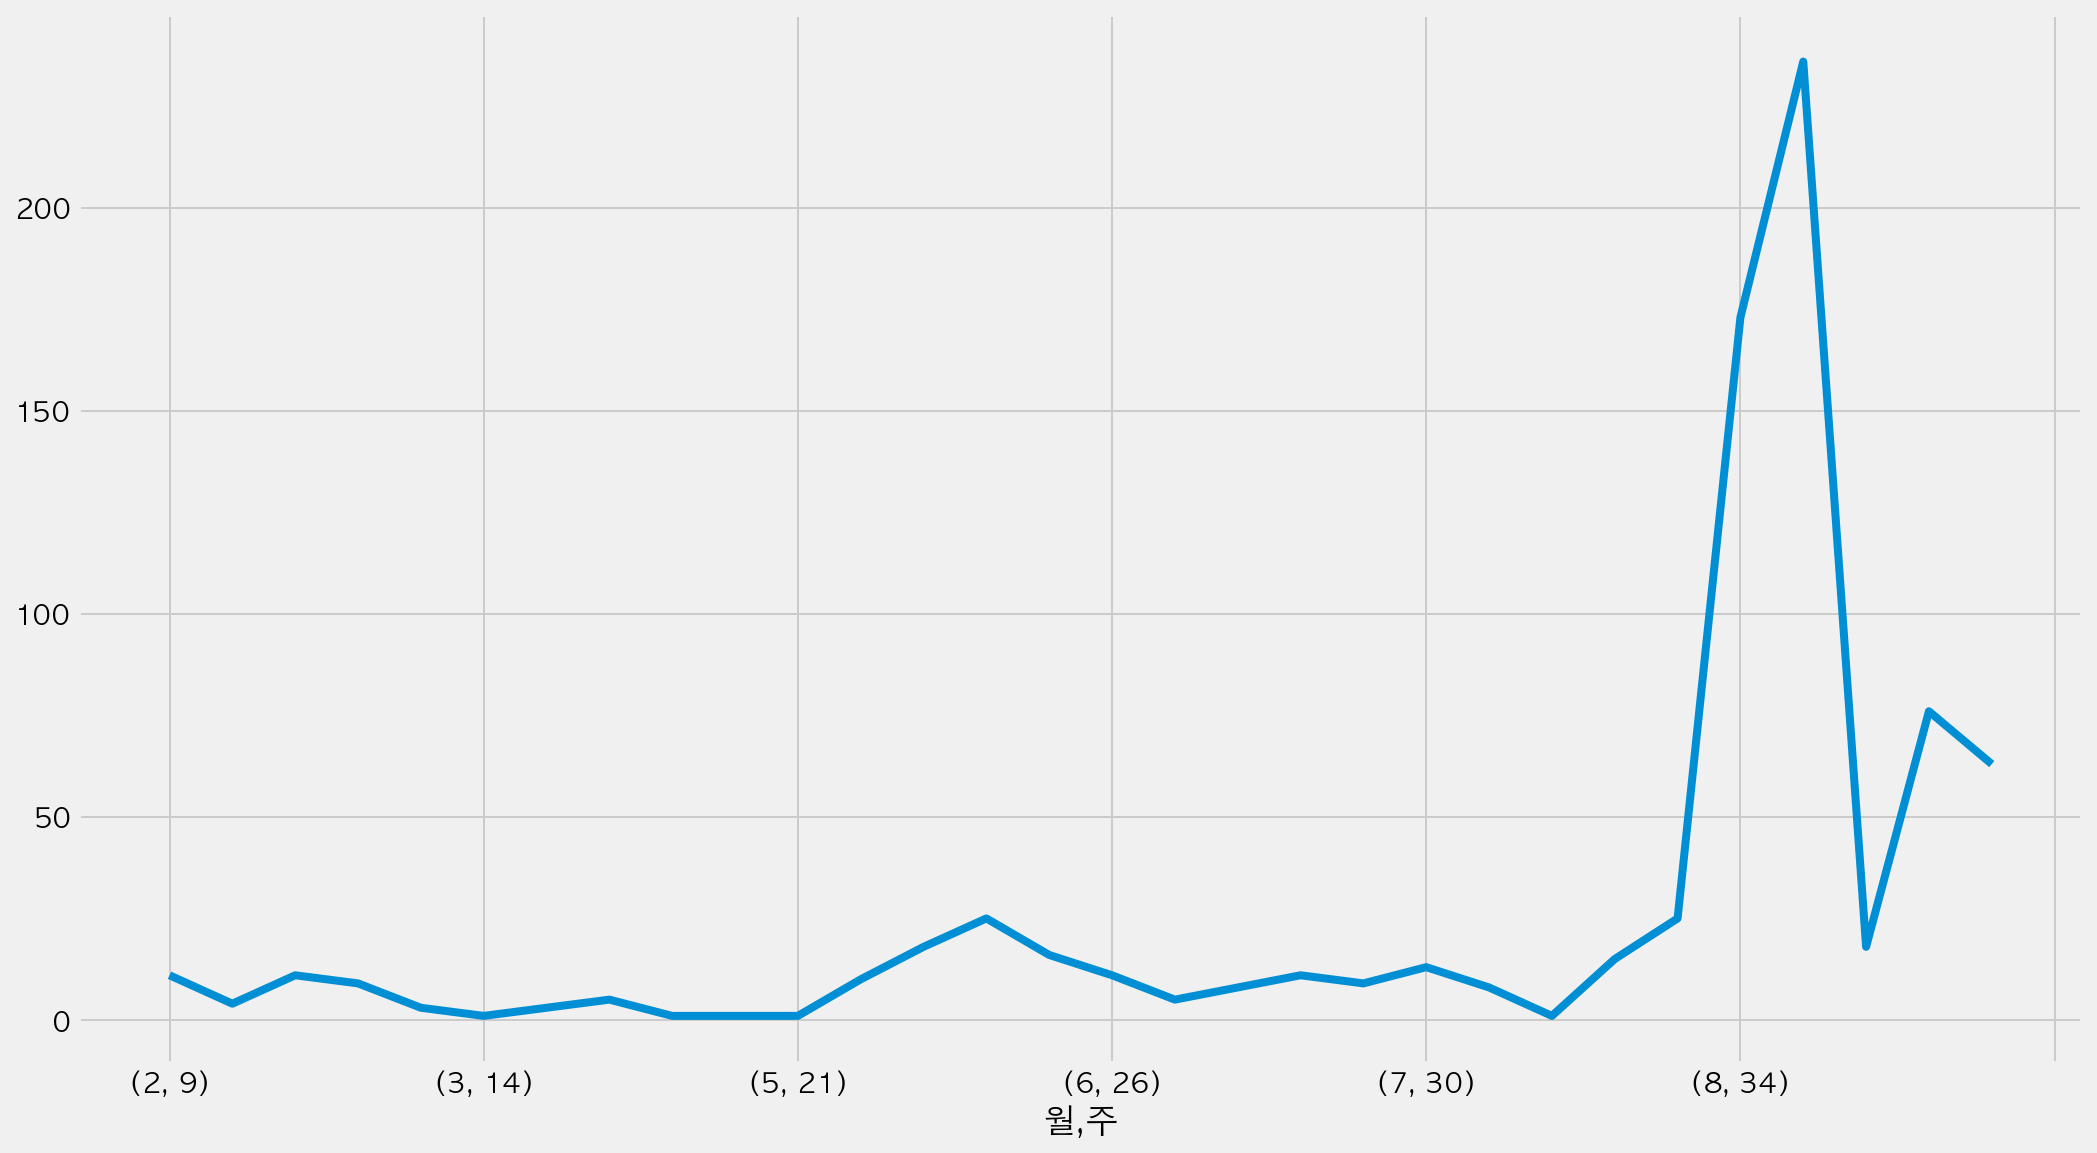

In [38]:
untracked_weekly_case = df_untracked.groupby(["월","주"])["연번"].count()
untracked_weekly_case.plot(figsize=(16,9))

In [39]:
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진자수"]
all_weekly_case.head()

,전체확진자수
35,924
34,913
36,458
33,390
37,266


In [40]:
untracked_weekly_case = df_untracked["주"].value_counts().to_frame()
untracked_weekly_case.columns = ["불명확진수"]
untracked_weekly_case.head()

,불명확진수
35,236
34,173
36,94
37,63
24,25


In [41]:
comparison = all_weekly_case.merge(untracked_weekly_case, left_index=True, right_index=True).sort_index()
comparison

,전체확진자수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


In [42]:
comparison[-4:]

,전체확진자수,불명확진수
34,913,173
35,924,236
36,458,94
37,266,63


<AxesSubplot:>

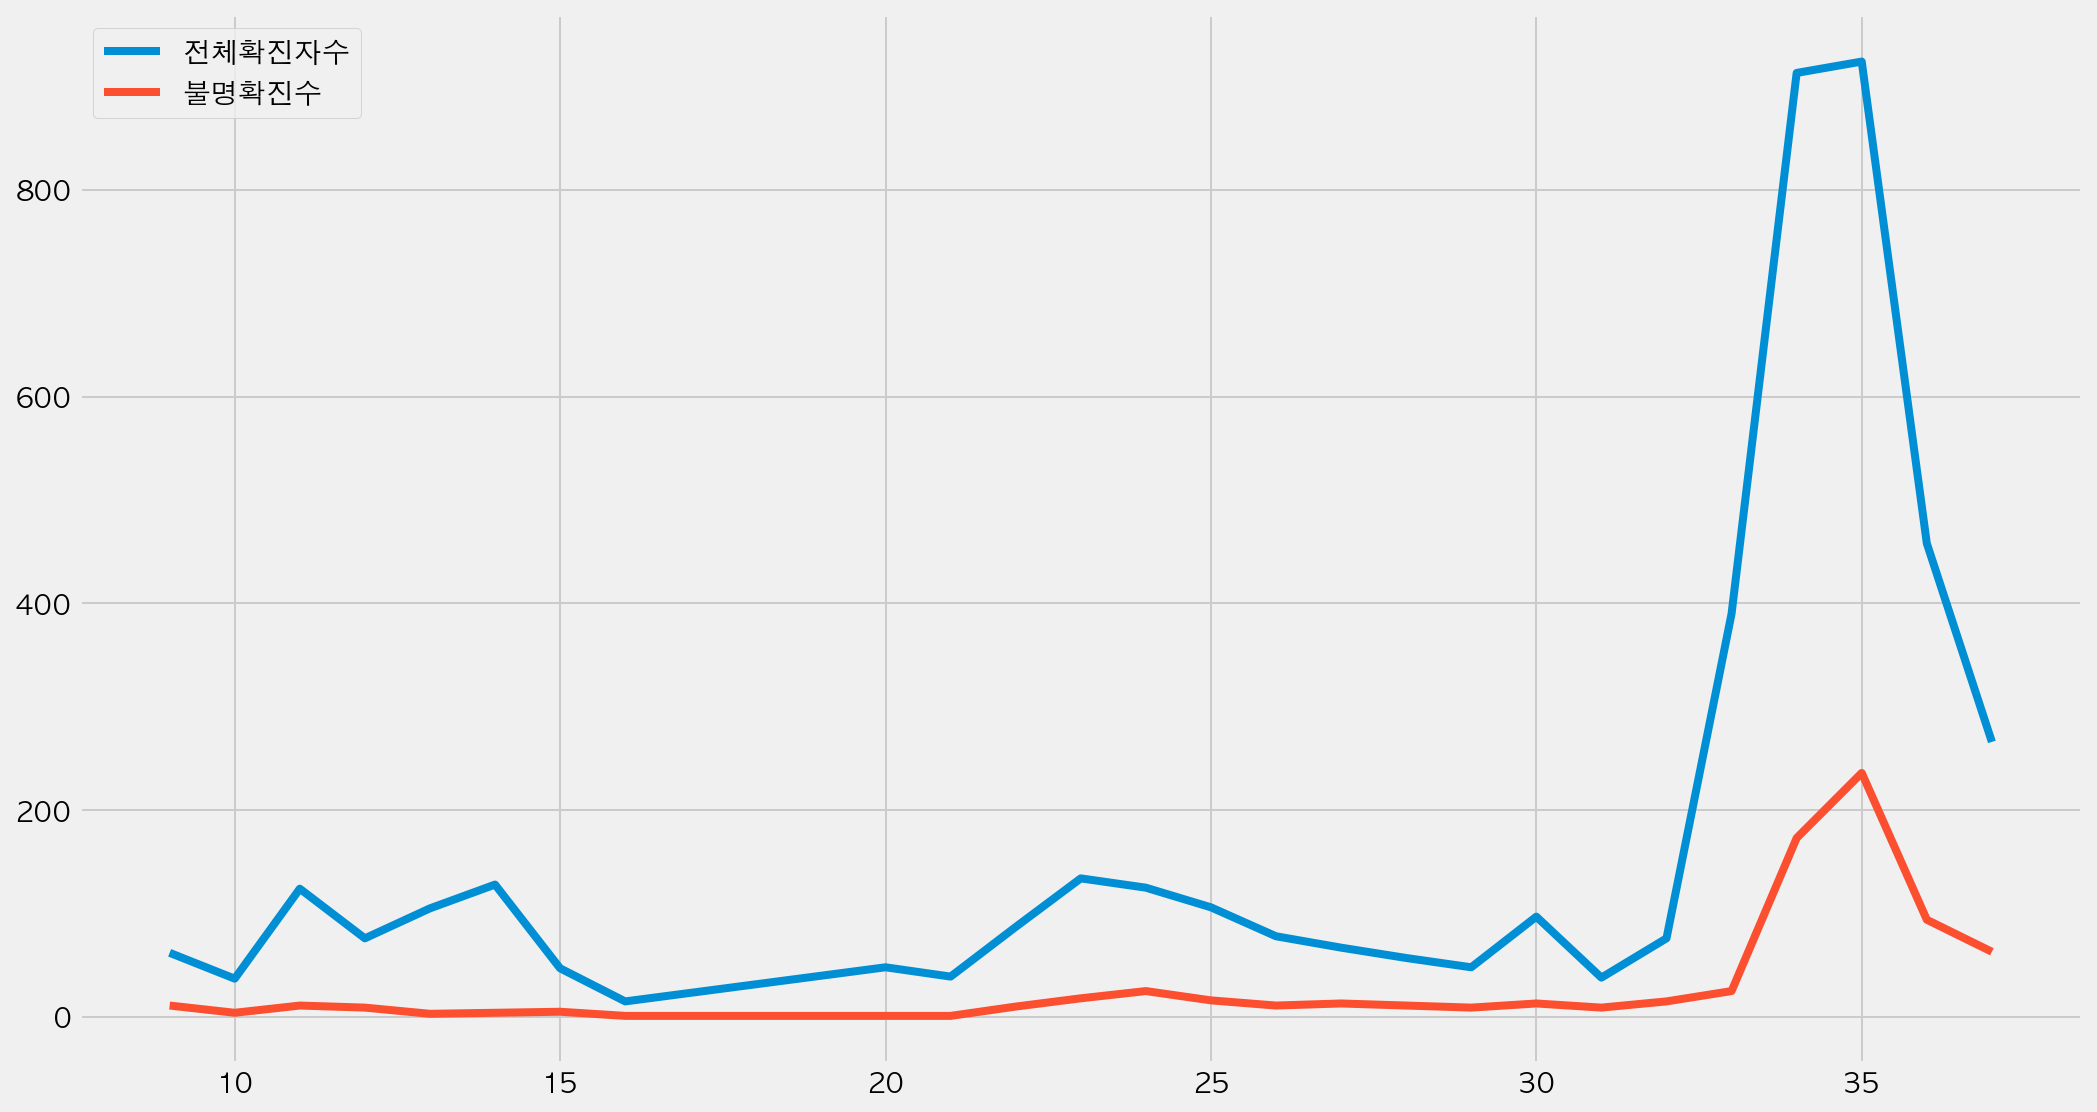

In [43]:
compare_graph = comparison.plot(figsize=(16,9))
compare_graph


In [44]:
fig_compare = compare_graph.get_figure()
fig_compare.savefig('./img/confirmed_vs_unconfirmed.png')

In [45]:
percentages = (comparison["불명확진수"] / comparison["전체확진자수"]) * 100
percentages

9     17.741935
10    10.810811
11     8.870968
12    11.842105
13     2.857143
14     3.125000
15    10.638298
16     6.666667
20     2.083333
21     2.564103
22    11.494253
23    13.432836
24    20.000000
25    15.094340
26    14.102564
27    19.402985
28    19.298246
29    18.750000
30    13.402062
31    23.684211
32    19.736842
33     6.410256
34    18.948521
35    25.541126
36    20.524017
37    23.684211
dtype: float64

In [46]:
percentages[-4:]

34    18.948521
35    25.541126
36    20.524017
37    23.684211
dtype: float64

20.0
19.402985074626866
19.298245614035086
18.75
23.684210526315788
19.736842105263158
18.948521358159912
25.541125541125542
20.52401746724891
23.684210526315788


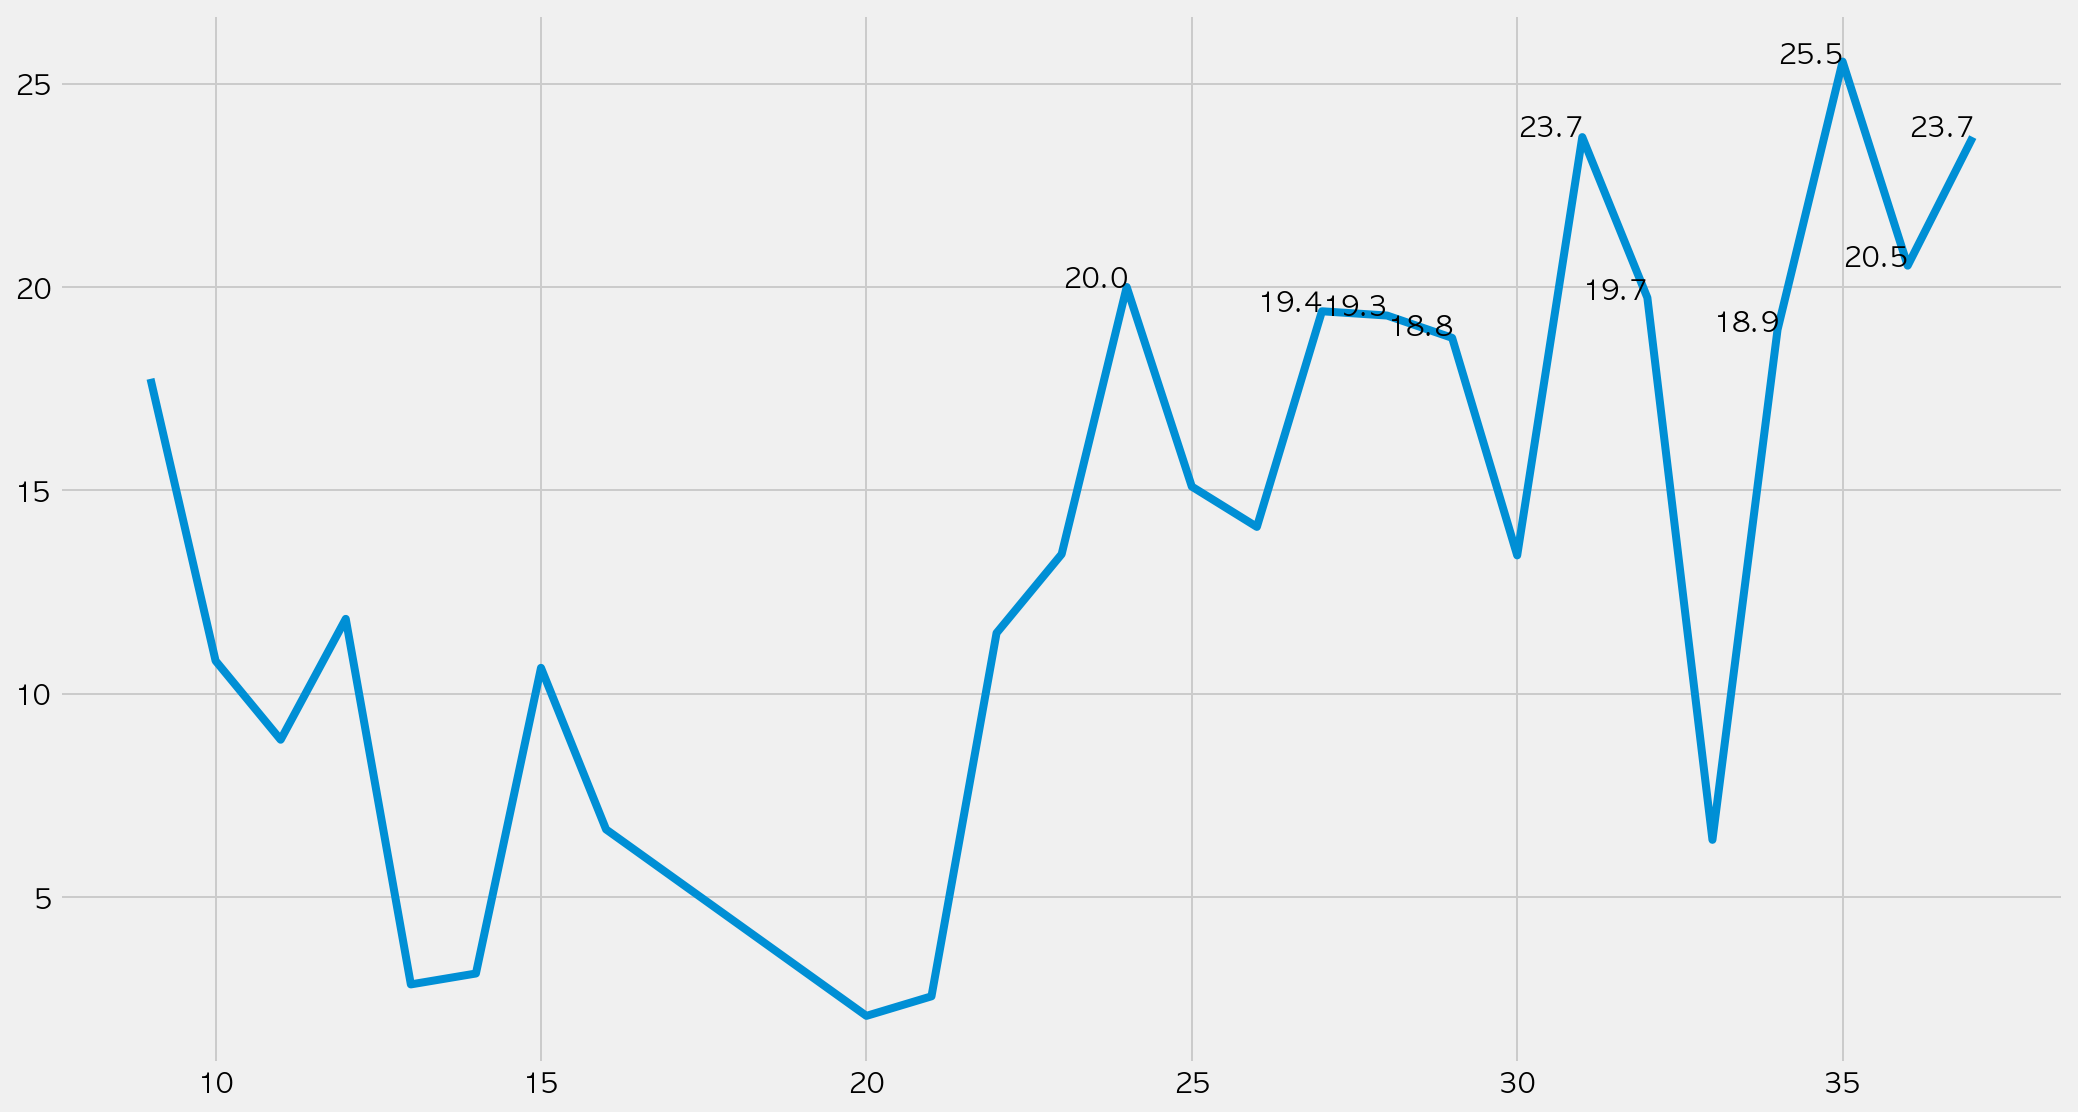

In [47]:
percentage_graph = percentages.plot(figsize=(16,9))

for i in range(len(percentages)):
    percent = percentages.iloc[i]
    percent = round(percent, 1)
    if percent > 18:
        print(percentages.iloc[i])
        percentage_graph.text(x=i+11, y=percent, s=percent)

In [48]:
fig = percentage_graph.get_figure()
fig.savefig('./img/unconfirmed_cases.png')